## **Import Libraries**

In [1]:
# For mathematical operations 
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For loading the dataset
import os

# For working with image data
import cv2

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For model building and training
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from tensorflow.keras import layers

# For calculating metrics of the model
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import learning_curve 

## **Load Dataset**

In [2]:
# Root directory

base_dir =  r'C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\DATASET'
folders = os.listdir(base_dir)
print(folders) 

['test', 'train']


## **Preprocess Data**

In [3]:
# Data Augmentation 

train_datagen = ImageDataGenerator(rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # set validation split
    ) 

gen = ImageDataGenerator(rescale=1./255)    # rescaling the images between 0 and 1

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\DATASET\train",
    target_size=(128,128),
    # color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    subset='training'
    )

val_generator = train_datagen.flow_from_directory(
    r"C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\DATASET\train",
    target_size=(128,128),
    # color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    subset='validation'
    )

test_gen = gen.flow_from_directory(
    r"C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\DATASET\test",
    target_size=(128,128),
    # color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

Found 10284 images belonging to 27 classes.
Found 2561 images belonging to 27 classes.
Found 4268 images belonging to 27 classes.


In [4]:
# Generate Labels

labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)  

{0: '0', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}


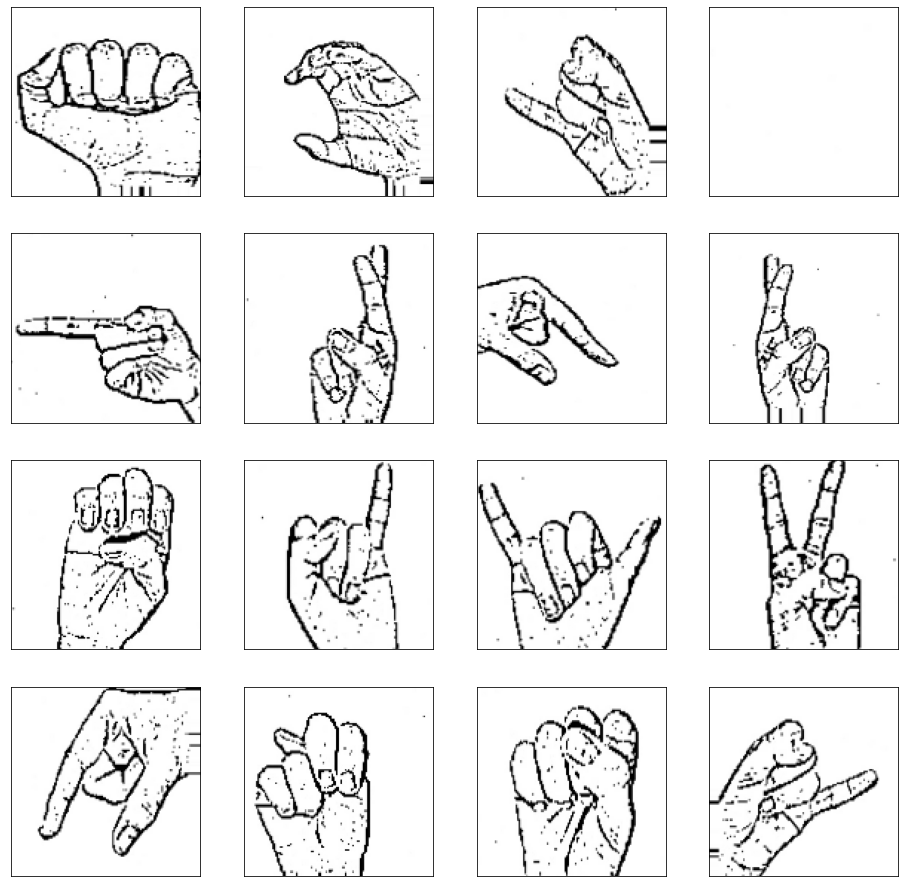

In [5]:
# View images  

x = train_generator.next()
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[0][i]) 

## **Model Building**

### Custom Model

In [6]:
# Initializing the CNN
classifier = Sequential()  

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu')) # input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [7]:
# Start training

history = classifier.fit(train_generator,
                         epochs=20,
                         validation_data=val_generator
                        )      

Epoch 1/20
322/322 [==============================] - 415s 1s/step - loss: 2.6032 - accuracy: 0.2178 - val_loss: 1.2379 - val_accuracy: 0.5923
Epoch 2/20
322/322 [==============================] - 345s 1s/step - loss: 0.9514 - accuracy: 0.6711 - val_loss: 0.5108 - val_accuracy: 0.8395
Epoch 3/20
322/322 [==============================] - 285s 884ms/step - loss: 0.5503 - accuracy: 0.8122 - val_loss: 0.3211 - val_accuracy: 0.9039
Epoch 4/20
322/322 [==============================] - 296s 918ms/step - loss: 0.3844 - accuracy: 0.8704 - val_loss: 0.2902 - val_accuracy: 0.9067
Epoch 5/20
322/322 [==============================] - 429s 1s/step - loss: 0.2984 - accuracy: 0.9035 - val_loss: 0.1949 - val_accuracy: 0.9426
Epoch 6/20
322/322 [==============================] - 226s 700ms/step - loss: 0.2520 - accuracy: 0.9157 - val_loss: 0.1589 - val_accuracy: 0.9485
Epoch 7/20
322/322 [==============================] - 249s 772ms/step - loss: 0.2228 - accuracy: 0.9273 - val_loss: 0.1619 - val_accu

In [8]:
# Evaluate the model on test data

accuracy = classifier.evaluate(test_gen)  
accuracy 

134/134 [==============================] - 39s 295ms/step - loss: 0.0105 - accuracy: 0.9960


[0.010501287877559662, 0.9960168600082397]

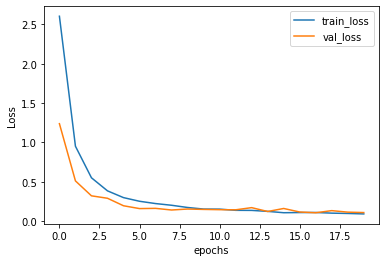

In [9]:
# Plot train and val loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show() 

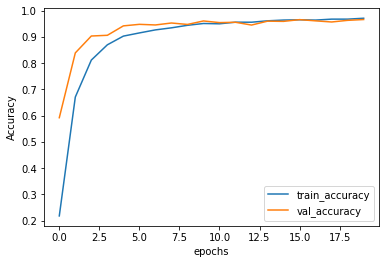

In [10]:
# Plot train and val accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show() 

Confusion Matrix



Text(0.5, 1.0, 'Accuracy Score: 0.9960168600082397')

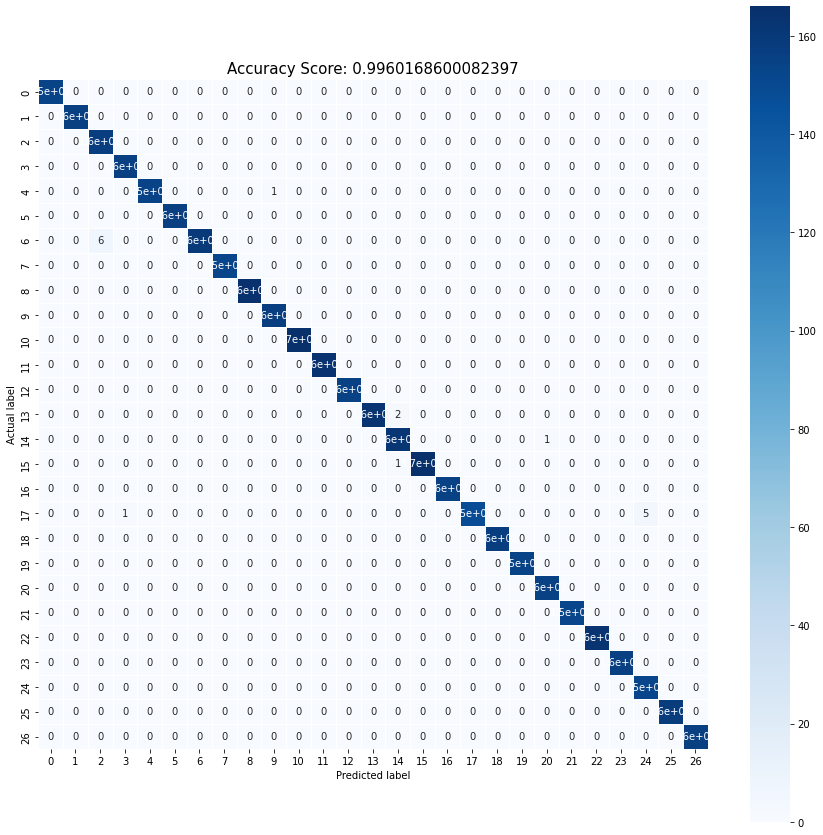

In [11]:
# Predict on test data

Y_pred = classifier.predict(test_gen)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
print('Confusion Matrix\n')

cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: " + str(accuracy[1]), size = 15)  

In [12]:
# Classification Report

print('Classification Report\n')
target_names = labels.values()
print(classification_report(test_gen.classes, y_pred, target_names=target_names)) 

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           A       1.00      1.00      1.00       156
           B       0.96      1.00      0.98       157
           C       0.99      1.00      1.00       156
           D       1.00      0.99      1.00       155
           E       1.00      1.00      1.00       156
           F       1.00      0.96      0.98       165
           G       1.00      1.00      1.00       153
           H       1.00      1.00      1.00       165
           I       0.99      1.00      1.00       157
           J       1.00      1.00      1.00       166
           K       1.00      1.00      1.00       164
           L       1.00      1.00      1.00       155
           M       1.00      0.99      0.99       165
           N       0.98      0.99      0.99       163
           O       1.00      0.99      1.00       167
           P       1.00      1.00      1.00       155
    

In [13]:
# Save the model

classifier.save(r"C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\Model\classifier.h5") 
print("Done !") 

Done !


### VGG16

In [15]:
# Initialize base model
base_model = tf.keras.applications.VGG16(input_shape=(128,128,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
base_model.trainable = False

# Add layers to base model
model_vgg = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(27, activation="softmax")
])

model_vgg.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr = 0.01), metrics='accuracy')
model_vgg.summary() 

58900480/58889256 [==============================] - 37s 1us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 512)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 27)                55323     
                                                                 
Total params: 14,770,011
Trainable params: 55,323
Non-trainable params: 14,714,688
_________________________________________________________________


c:\Users\devan_s1ts7c0\.conda\envs\dl\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
# Start training
history = model_vgg.fit(train_generator,
                        epochs=20,
                        validation_data=val_generator
                        )     

Epoch 1/20
322/322 [==============================] - 1694s 5s/step - loss: 0.3046 - accuracy: 0.9447 - val_loss: 0.0203 - val_accuracy: 0.9988
Epoch 2/20
322/322 [==============================] - 1617s 5s/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0091 - val_accuracy: 0.9984
Epoch 3/20
322/322 [==============================] - 1602s 5s/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0734 - val_accuracy: 0.9785
Epoch 4/20
322/322 [==============================] - 1665s 5s/step - loss: 0.0194 - accuracy: 0.9952 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 5/20
322/322 [==============================] - 1629s 5s/step - loss: 0.0220 - accuracy: 0.9943 - val_loss: 0.3147 - val_accuracy: 0.8696
Epoch 6/20
322/322 [==============================] - 1660s 5s/step - loss: 0.0768 - accuracy: 0.9817 - val_loss: 0.0205 - val_accuracy: 0.9941
Epoch 7/20
322/322 [==============================] - 1743s 5s/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 0.0101 - val_accuracy:

In [17]:
# Evaluating the model on test data

accuracy2 = model_vgg.evaluate(test_gen) 
accuracy2 

134/134 [==============================] - 528s 4s/step - loss: 0.0037 - accuracy: 0.9993


[0.0036836492363363504, 0.9992970824241638]

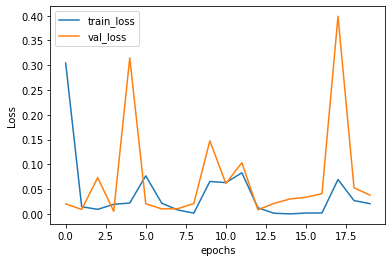

In [18]:
# Plot train and val loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

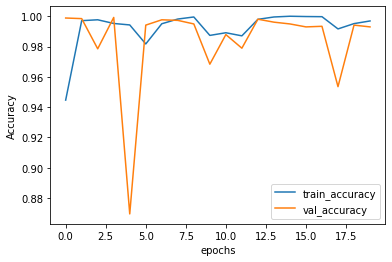

In [19]:
# Plot train and val accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

Confusion Matrix



Text(0.5, 1.0, 'Accuracy Score: 0.9992970824241638')

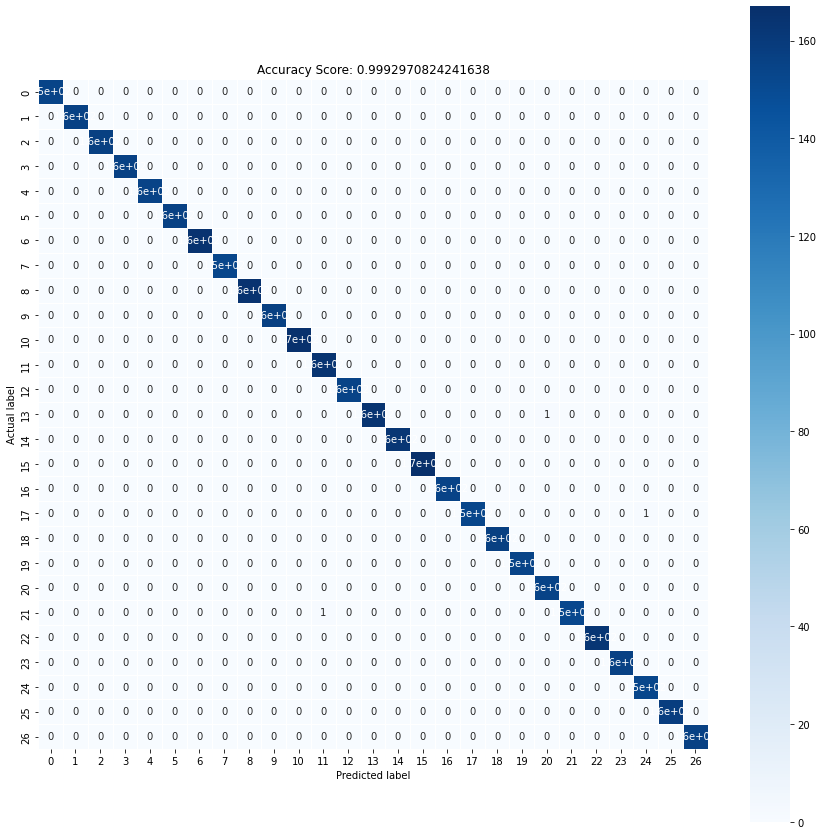

In [20]:
# Predict on test data

Y_pred2 = model_vgg.predict(test_gen)
y_pred2 = np.argmax(Y_pred2, axis=1)

# Confusion Matrix
print('Confusion Matrix\n')

cm = confusion_matrix(test_gen.classes, y_pred2)

plt.figure(figsize=(15,15))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True,  cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: " + str(accuracy2[1]), size=12)  

In [21]:
# Classification Report

print('Classification Report\n')
target_names = labels.values()
print(classification_report(test_gen.classes, y_pred2, target_names=target_names))

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           A       1.00      1.00      1.00       156
           B       1.00      1.00      1.00       157
           C       1.00      1.00      1.00       156
           D       1.00      1.00      1.00       155
           E       1.00      1.00      1.00       156
           F       1.00      1.00      1.00       165
           G       1.00      1.00      1.00       153
           H       1.00      1.00      1.00       165
           I       1.00      1.00      1.00       157
           J       1.00      1.00      1.00       166
           K       0.99      1.00      1.00       164
           L       1.00      1.00      1.00       155
           M       1.00      0.99      1.00       165
           N       1.00      1.00      1.00       163
           O       1.00      1.00      1.00       167
           P       1.00      1.00      1.00       155
    

In [22]:
# Save the model

classifier.save(r'C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\Model\classifier_vgg16.h5')
print("Done !") 

Done !


### MobileNetV2

In [23]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3), 
                                               include_top=False,
                                               weights = "imagenet"
                                               )
base_model.trainable = False 

model_mobv2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(27, activation="softmax")
])

model_mobv2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr = 0.01) , metrics='accuracy')
model_mobv2.summary() 

9420800/9406464 [==============================] - 5s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 1280)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5120)              0         
                                                                 
 dense_5 (Dense)             (None, 27)                138267    
                                                                 
Total params: 2,396,251
Trainable params: 138,267
Non-trainable params: 2,257,984
_________________________________________

c:\Users\devan_s1ts7c0\.conda\envs\dl\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
history = model_mobv2.fit(train_generator,
                          epochs=20,
                          validation_data=val_generator
                        )     

Epoch 1/20
322/322 [==============================] - 232s 705ms/step - loss: 2.1386 - accuracy: 0.9377 - val_loss: 0.2616 - val_accuracy: 0.9742
Epoch 2/20
322/322 [==============================] - 221s 686ms/step - loss: 0.2638 - accuracy: 0.9865 - val_loss: 1.1640 - val_accuracy: 0.9512
Epoch 3/20
322/322 [==============================] - 222s 691ms/step - loss: 0.5538 - accuracy: 0.9809 - val_loss: 0.5684 - val_accuracy: 0.9805
Epoch 4/20
322/322 [==============================] - 233s 725ms/step - loss: 0.2314 - accuracy: 0.9916 - val_loss: 0.5647 - val_accuracy: 0.9797
Epoch 5/20
322/322 [==============================] - 229s 710ms/step - loss: 0.2442 - accuracy: 0.9909 - val_loss: 1.1718 - val_accuracy: 0.9660
Epoch 6/20
322/322 [==============================] - 223s 692ms/step - loss: 0.1300 - accuracy: 0.9956 - val_loss: 0.7661 - val_accuracy: 0.9746
Epoch 7/20
322/322 [==============================] - 229s 711ms/step - loss: 0.2976 - accuracy: 0.9914 - val_loss: 0.1992 -

In [25]:
# Evaluating the model on test data

accuracy3 = model_mobv2.evaluate(test_gen) 
accuracy3 

134/134 [==============================] - 57s 422ms/step - loss: 1.8601 - accuracy: 0.9745


[1.8601248264312744, 0.9744610786437988]

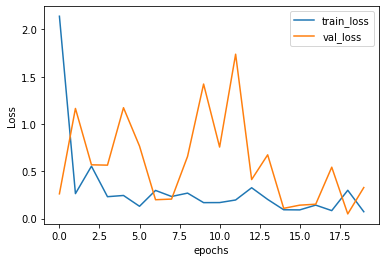

In [26]:
# Plot train and val loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

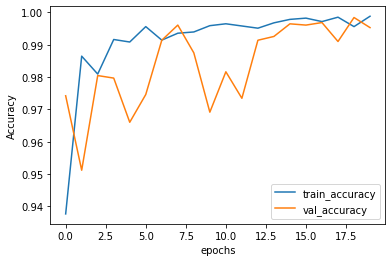

In [27]:
# Plot train and val accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show() 

Confusion Matrix



Text(0.5, 1.0, 'Accuracy Score: 0.9744610786437988')

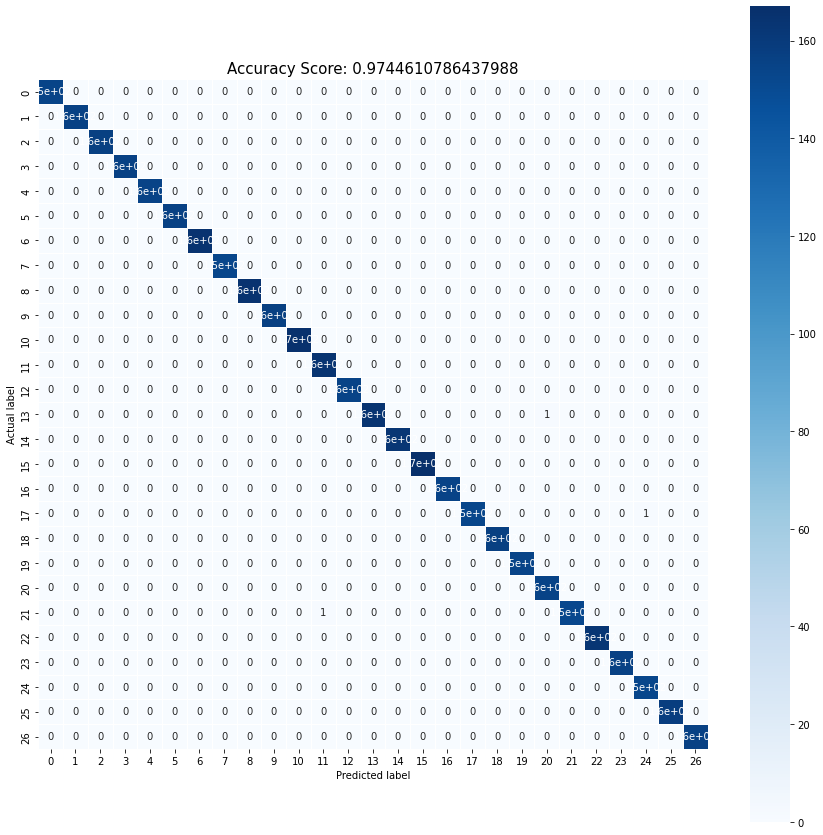

In [28]:
# Predict on test data

Y_pred3 = model_mobv2.predict(test_gen)
y_pred3 = np.argmax(Y_pred2, axis=1)

# Confusion Matrix
print('Confusion Matrix\n')

cm = confusion_matrix(test_gen.classes, y_pred3)

plt.figure(figsize=(15,15))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True,  cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Accuracy Score: " + str(accuracy3[1]), size = 15)  

In [29]:
# Classification Report 

print('Classification Report\n')
target_names = labels.values()
print(classification_report(test_gen.classes, y_pred3, target_names=target_names))

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           A       1.00      1.00      1.00       156
           B       1.00      1.00      1.00       157
           C       1.00      1.00      1.00       156
           D       1.00      1.00      1.00       155
           E       1.00      1.00      1.00       156
           F       1.00      1.00      1.00       165
           G       1.00      1.00      1.00       153
           H       1.00      1.00      1.00       165
           I       1.00      1.00      1.00       157
           J       1.00      1.00      1.00       166
           K       0.99      1.00      1.00       164
           L       1.00      1.00      1.00       155
           M       1.00      0.99      1.00       165
           N       1.00      1.00      1.00       163
           O       1.00      1.00      1.00       167
           P       1.00      1.00      1.00       155
    

In [30]:
# Save the model

classifier.save(r'C:\Users\devan_s1ts7c0\OneDrive\Desktop\Sign Language Recognition\Model\classifier_mobv2.h5')
print("Done !") 

Done !


## **Thank You!** 